<a href="https://colab.research.google.com/github/matrasakti/Recruitment-Prediction-Project/blob/main/Recruitment_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action="ignore")

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# classifier options
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# libraries for evaluating model performance
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import pickle

In [ ]:
df = pd.read_csv('recruitment_data.csv')

In [ ]:
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


# 1.&nbsp;EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,35.148667,9.252728,20.000000,27.000000,35.000000,43.000000,50.000000
Gender,1500.0,0.492000,0.500103,0.000000,0.000000,0.000000,1.000000,1.000000
EducationLevel,1500.0,2.188000,0.862449,1.000000,2.000000,2.000000,3.000000,4.000000
ExperienceYears,1500.0,7.694000,4.641414,0.000000,4.000000,8.000000,12.000000,15.000000
PreviousCompanies,1500.0,3.002000,1.410670,1.000000,2.000000,3.000000,4.000000,5.000000
DistanceFromCompany,1500.0,25.505379,14.567151,1.031376,12.838851,25.502239,37.737996,50.992462
InterviewScore,1500.0,50.564000,28.626215,0.000000,25.000000,52.000000,75.000000,100.000000
SkillScore,1500.0,51.116000,29.353563,0.000000,25.750000,53.000000,76.000000,100.000000
PersonalityScore,1500.0,49.387333,29.353201,0.000000,23.000000,49.000000,76.000000,100.000000
RecruitmentStrategy,1500.0,1.893333,0.689642,1.000000,1.000000,2.000000,2.000000,3.000000


In [ ]:
df.shape

(1500, 11)

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
EducationLevel,0
ExperienceYears,0
PreviousCompanies,0
DistanceFromCompany,0
InterviewScore,0
SkillScore,0
PersonalityScore,0
RecruitmentStrategy,0


In [ ]:
df['HiringDecision'].value_counts()

,count
HiringDecision,
0,1035
1,465


In [ ]:
df['HiringDecision'].value_counts(normalize=True)

,proportion
HiringDecision,
0,0.69
1,0.31


#2.&nbsp;Data Visualization




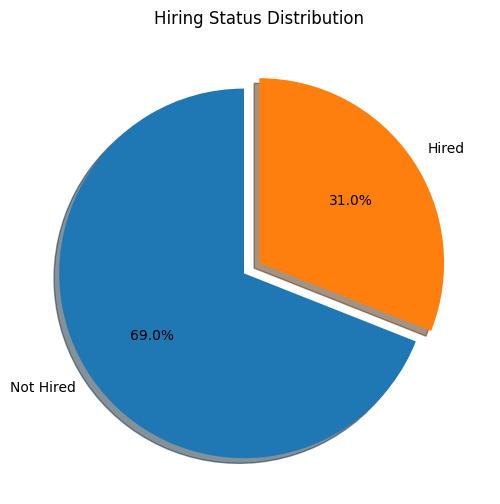

In [ ]:
status_counts = df['HiringDecision'].value_counts()

explode = [0.1 if status == 0 else 0 for status in status_counts.index]

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(
    status_counts,
    labels=['Not Hired', 'Hired'],
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Hiring Status Distribution')
plt.show()

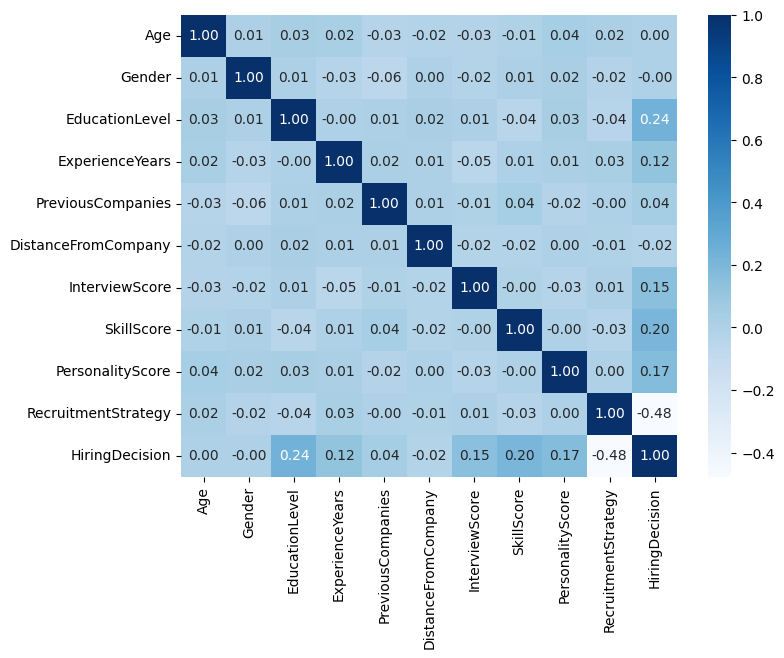

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.corr(),
    cmap='Blues',
    annot=True,
    fmt='.2f'
);

In [ ]:
k = 11
k_largest_corr = df.corr().nlargest(k, 'HiringDecision')
k_largest_feats = k_largest_corr['HiringDecision'].index
list(k_largest_feats)

['HiringDecision',
 'EducationLevel',
 'SkillScore',
 'PersonalityScore',
 'InterviewScore',
 'ExperienceYears',
 'PreviousCompanies',
 'Age',
 'Gender',
 'DistanceFromCompany',
 'RecruitmentStrategy']

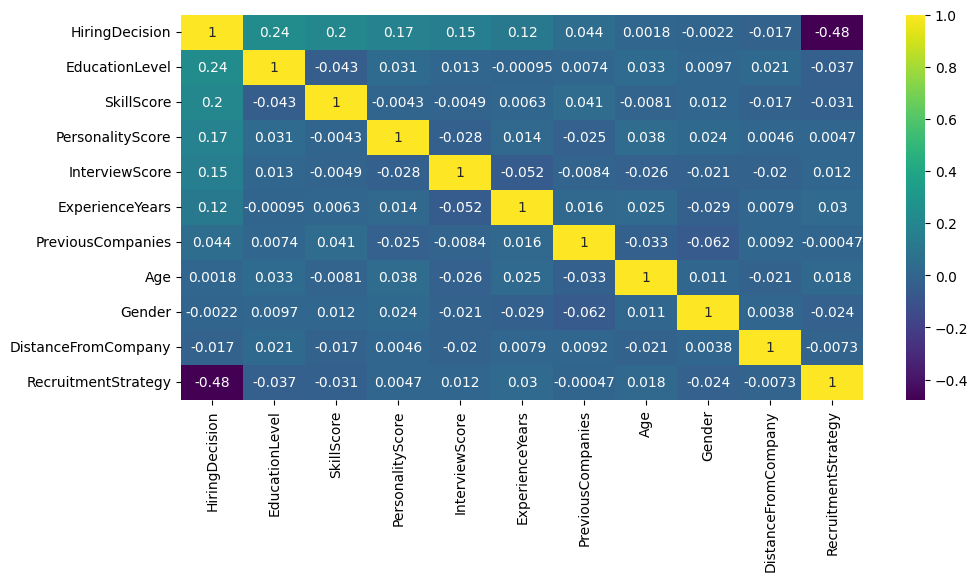

In [ ]:
# Outcome correlation matrix

k = 11 # number of variables for heatmap
cols = df.corr().nlargest(k, 'HiringDecision')['HiringDecision'].index
corr_mat = df[cols].corr()

# Visualize
plt.figure(figsize=(11, 5))
sns.heatmap(
    corr_mat,
    cmap='viridis',
    annot=True,
);

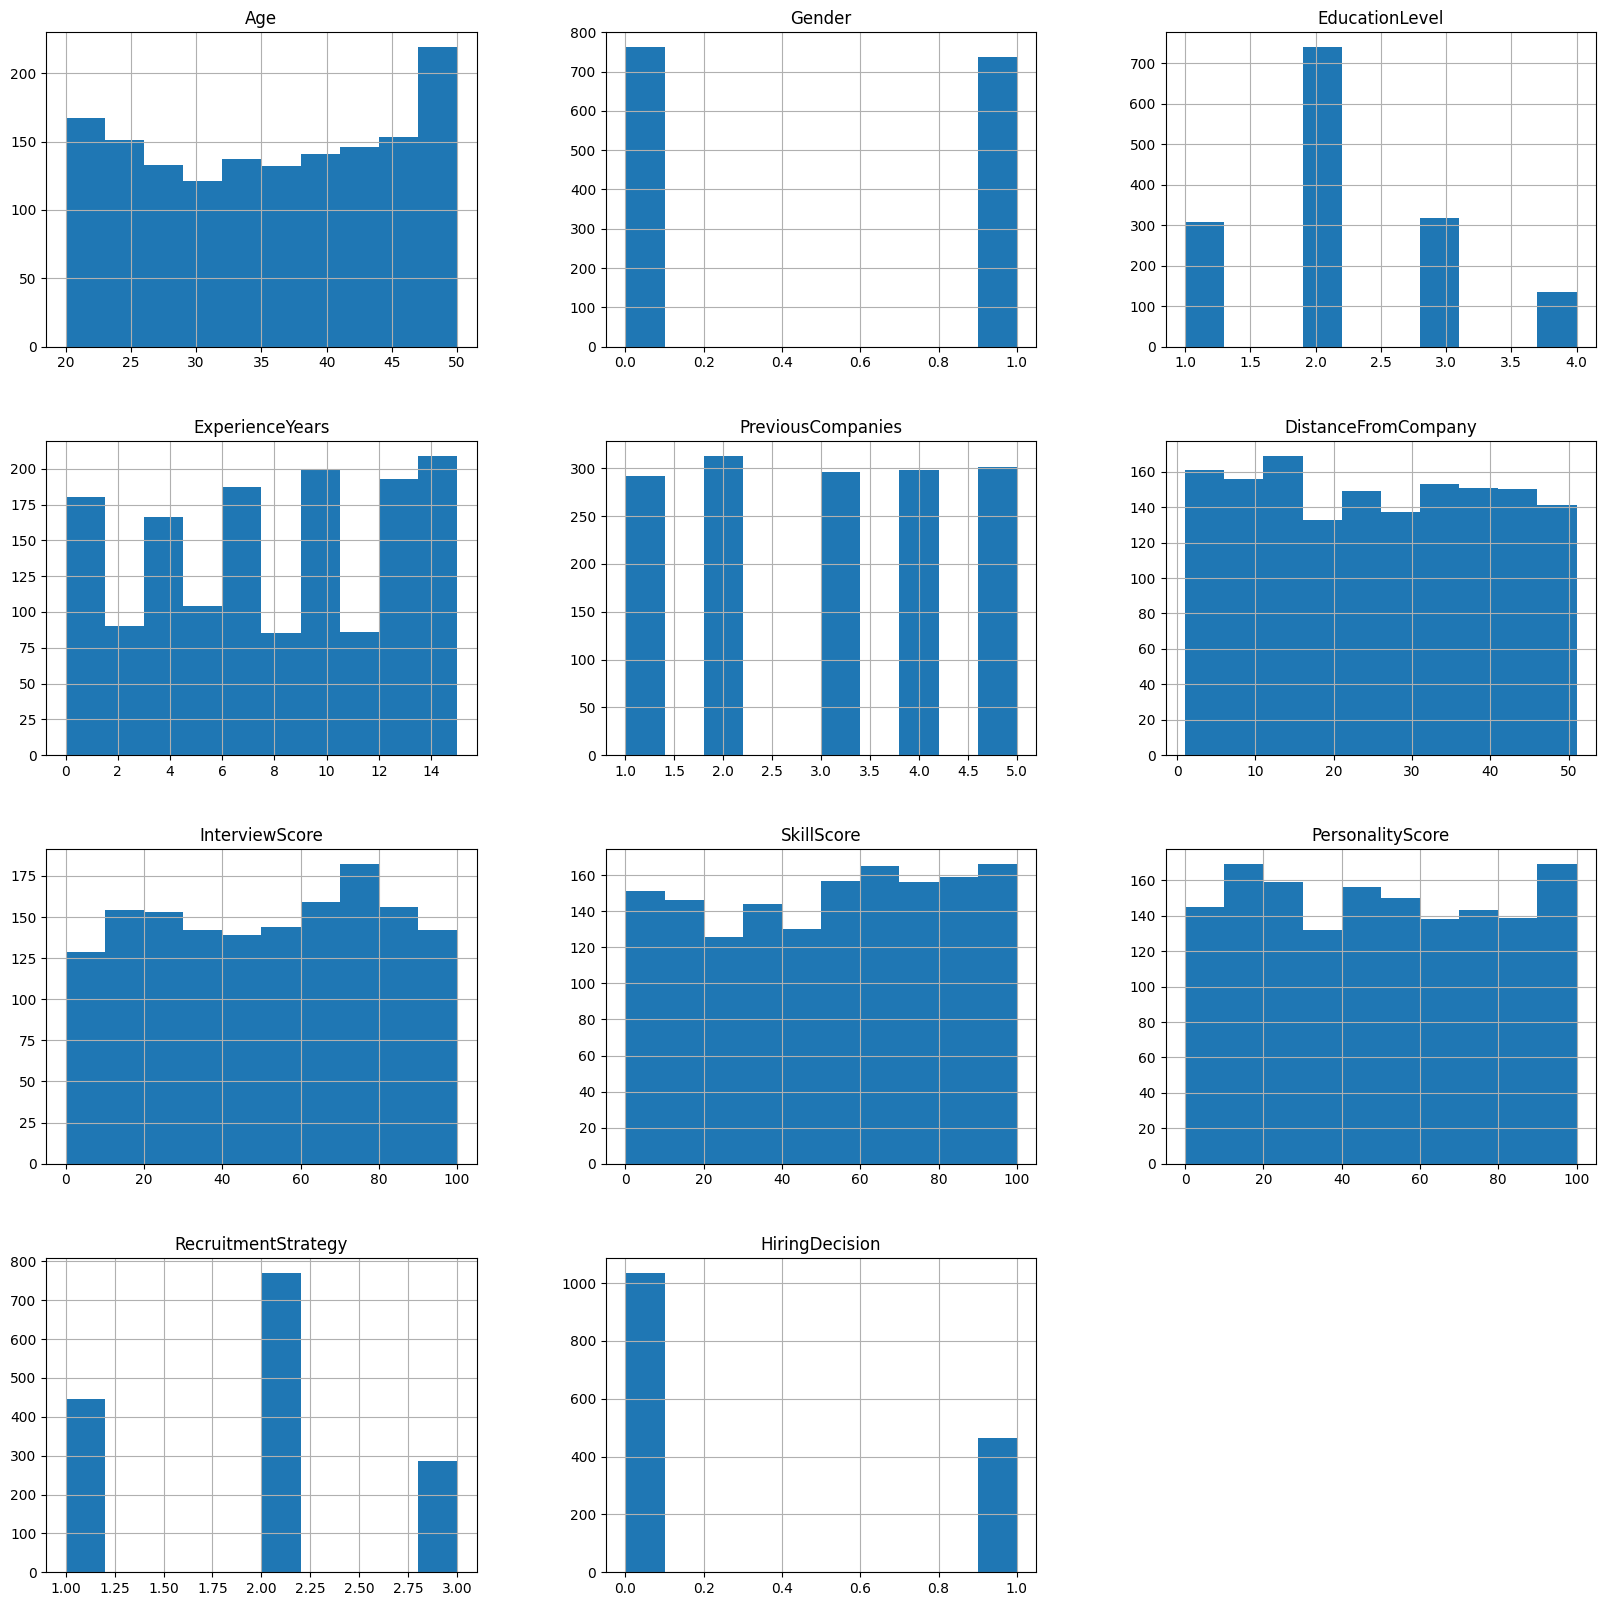

In [ ]:
# see how the data is distributed.
df.hist(figsize=(20,20));

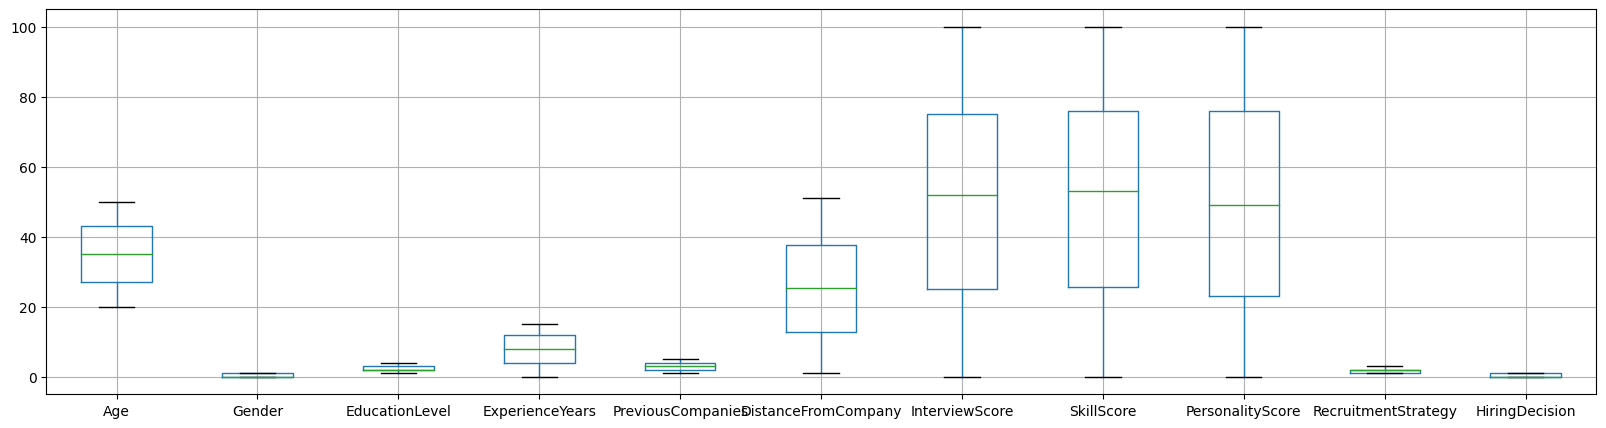

In [ ]:
df.boxplot(figsize=(20,5));

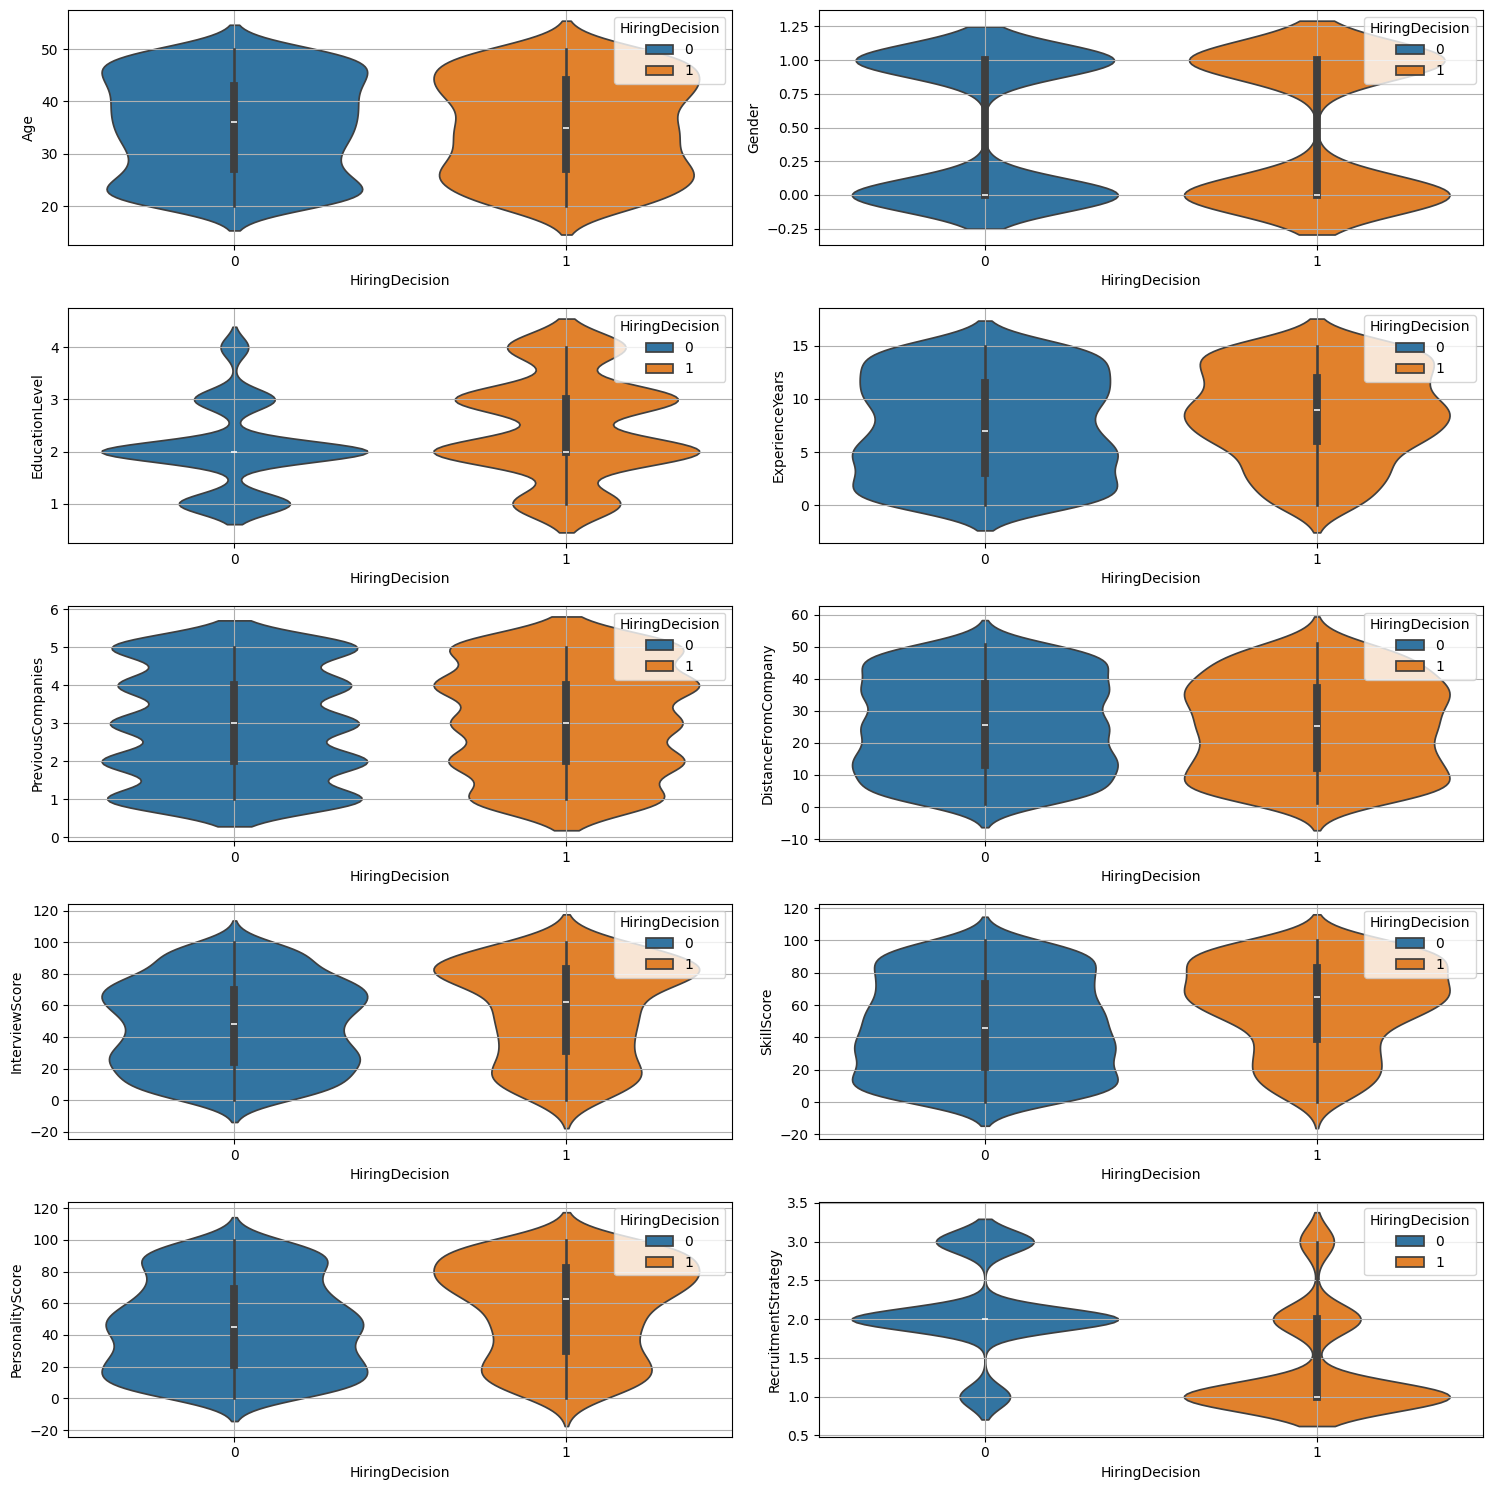

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
axes = axes.flatten()

plot_number = 0

for col in df.columns:
    if col != "HiringDecision":
        ax = axes[plot_number]
        sns.violinplot(data=df, x="HiringDecision", y=col, hue="HiringDecision", ax=ax)
        ax.grid(True)
        plot_number += 1
        if plot_number == 10:
            break

for i in range(plot_number, 10):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

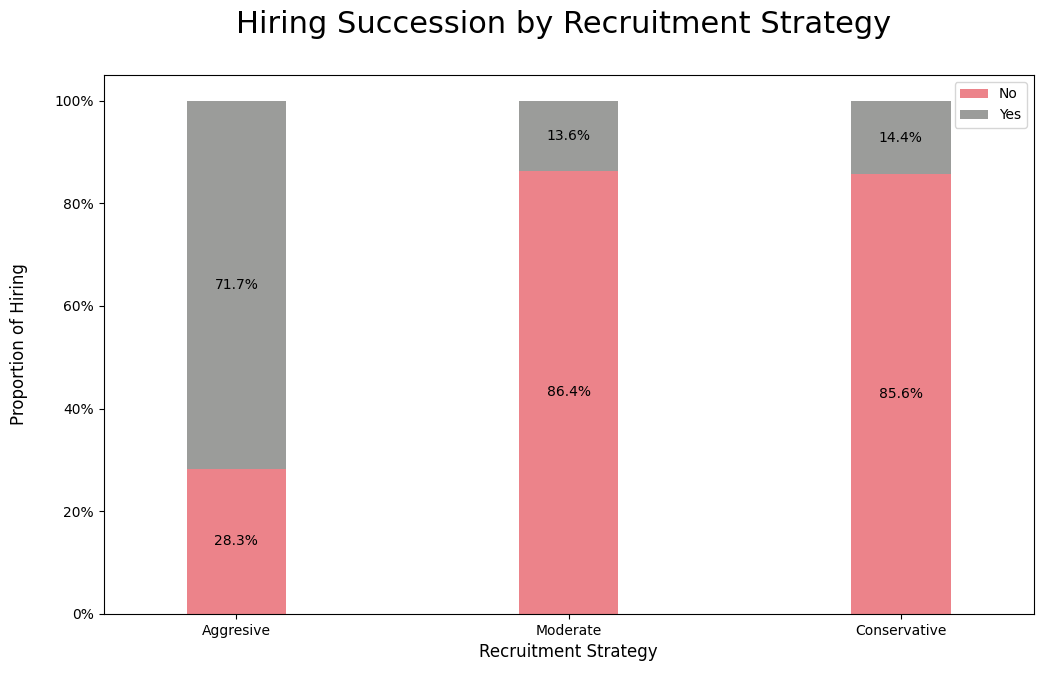

In [ ]:
import matplotlib.ticker as mtick

hiring_rate = df.groupby(['RecruitmentStrategy','HiringDecision']).size().unstack()

hiring_rate.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (hiring_rate.T*100.0 / hiring_rate.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Hiring\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Recruitment Strategy\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Hiring Succession by Recruitment Strategy \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks([0,1,2],['Aggresive', 'Moderate', 'Conservative'],rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

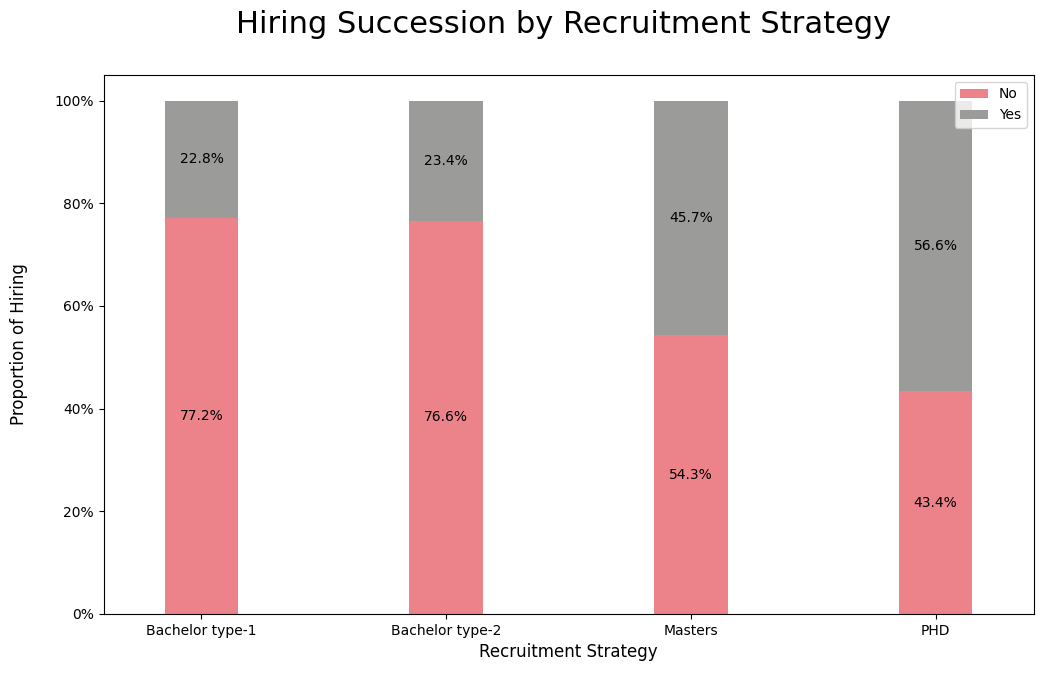

In [ ]:
hiring_rates = df.groupby(['EducationLevel','HiringDecision']).size().unstack()

hiring_rates.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (hiring_rates.T*100.0 / hiring_rates.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Hiring\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Recruitment Strategy\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Hiring Succession by Recruitment Strategy \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks([0,1,2,3],['Bachelor type-1', 'Bachelor type-2', 'Masters', 'PHD'],rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1f}%'.format(height),
            horizontalalignment='center',
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [ ]:
fig = px.histogram(df, x='RecruitmentStrategy', color='HiringDecision', title='Number of Hiring by Recruitment Strategy')
fig.update_layout(
    xaxis_title='Recruitment Strategy',
    xaxis=dict(
        tickvals=[1, 2, 3],
        ticktext=['Aggresive', 'Moderate', 'Conservative']
    ),
    yaxis_title='Number of Hiring',
    bargap=0.2,
    yaxis=dict(
        tickmode='linear',
        tickvals=[1,2],
        ticktext=['Yes','No'],
        tick0=0,
        dtick=100
    )
)
fig.update_traces({'name': 'Yes'}, selector={'name': '1'})
fig.update_traces({'name': 'No'}, selector={'name': '0'})
fig.update_traces(texttemplate='%{y}', textposition='inside', insidetextanchor="middle")
fig.show()

In [ ]:
fig = px.histogram(df, x='EducationLevel', color='HiringDecision', title='Number of Hiring by Educational Level')
fig.update_layout(
    xaxis_title='EducationLevel',
    xaxis=dict(
        tickvals=[1, 2, 3, 4],
        ticktext=['Bachelor type-1', 'Bachelor type-2', 'Masters', 'PHD']
    ),
    yaxis_title='Number of Hiring',
    bargap=0.2,
    yaxis=dict(
        tickmode='linear',
        tickvals=[1,2],
        ticktext=['Yes','No'],
        tick0=0,
        dtick=100
    )
)
fig.update_traces({'name': 'Yes'}, selector={'name': '1'})
fig.update_traces({'name': 'No'}, selector={'name': '0'})
fig.update_traces(texttemplate='%{y}', textposition='inside', insidetextanchor="middle")
fig.show()

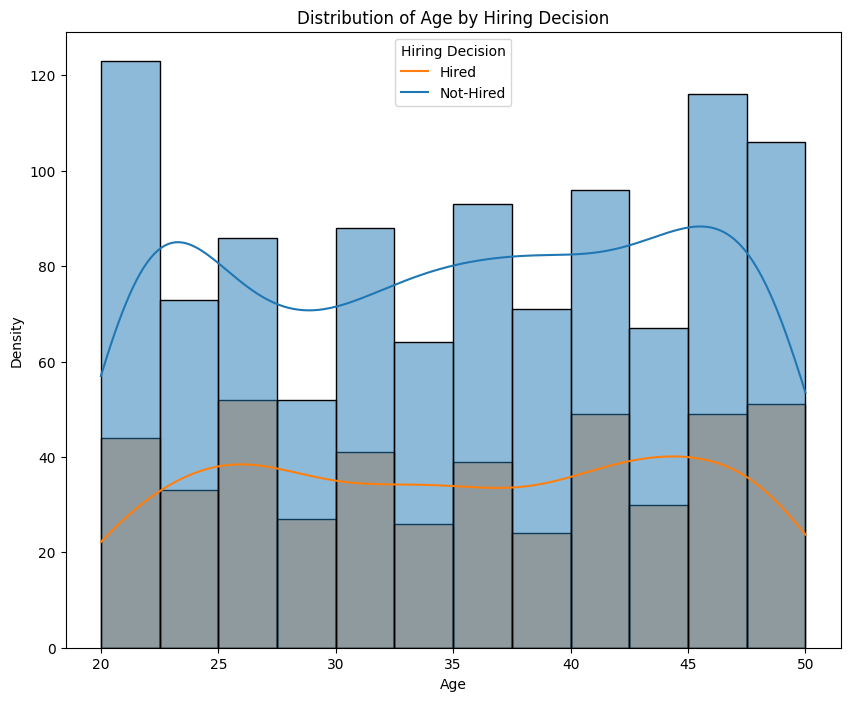

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Age', hue='HiringDecision', kde=True)

plt.title('Distribution of Age by Hiring Decision')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Hiring Decision', labels=['Hired', 'Not-Hired'])
plt.show()

#3.&nbsp;Data Preprocessing

##3.1.&nbsp;Handling Outlier

In [ ]:
df_cp=df.copy()

In [ ]:
df_cp.describe(
    percentiles=[0.20, 0.40, 0.60, 0.80, 0.99]
).T

,count,mean,std,min,20%,40%,50%,60%,80%,99%,max
Age,1500.0,35.148667,9.252728,20.000000,25.000000,32.000000,35.000000,39.000000,45.000000,50.000000,50.000000
Gender,1500.0,0.492000,0.500103,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
EducationLevel,1500.0,2.188000,0.862449,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000
ExperienceYears,1500.0,7.694000,4.641414,0.000000,3.000000,6.000000,8.000000,9.000000,12.000000,15.000000,15.000000
PreviousCompanies,1500.0,3.002000,1.410670,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,5.000000,5.000000
DistanceFromCompany,1500.0,25.505379,14.567151,1.031376,10.447367,20.328256,25.502239,30.642006,40.597355,50.647334,50.992462
InterviewScore,1500.0,50.564000,28.626215,0.000000,21.000000,41.000000,52.000000,62.000000,79.000000,99.000000,100.000000
SkillScore,1500.0,51.116000,29.353563,0.000000,20.000000,42.000000,53.000000,62.000000,82.000000,100.000000,100.000000
PersonalityScore,1500.0,49.387333,29.353201,0.000000,19.000000,39.000000,49.000000,59.000000,80.000000,99.000000,100.000000
RecruitmentStrategy,1500.0,1.893333,0.689642,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000


In [ ]:
def outlier_thresholds(
        df_cp, feature,
        quantile_lower=0.25,
        quantile_upper=0.75):

    Q1 = df_cp[feature].quantile(quantile_lower)
    Q3 = df_cp[feature].quantile(quantile_upper)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return lower_limit, upper_limit

In [ ]:
def has_outliers(
        df_cp, feature,
        quantile_lower=0.25,
        quantile_upper=0.75):
    """
    Args:
        df_cp (pd.DataFrame): DataFrame containing feature
        feature (str): feature name to be checked
        quantile_lower: Manually set the point for Q1, default: 0.25
        quantile_upper: Manually set the point for Q3, default: 0.75

    Return:
        bool: Is outlier(s) exist in given feature in the DataFrame
    """
    low_lim, up_lim = outlier_thresholds(
        df_cp, feature, quantile_lower, quantile_upper)

    exist_lower_outliers = (df_cp[feature] < low_lim).any(axis=None)
    exist_upper_outliers = (df_cp[feature] > up_lim).any(axis=None)

    return (exist_lower_outliers or exist_upper_outliers)

In [ ]:
feats_with_outliers = []

for feat in df_cp.columns:
    exist_outliers = has_outliers(
        df_cp, feat, quantile_lower=0.1, quantile_upper=0.9)
    if exist_outliers:
        print(f"Outliers exist in {feat}!")
        feats_with_outliers.append(feat)

In [ ]:
feats_with_outliers

[]

dataset has no outlier

#4.&nbsp; Feature Engineering

## 4.1.&nbsp;Feature Categorization

In [ ]:
df_cp['New_Age_Categorization'] = pd.cut(
    x=df_cp['Age'],
    bins=[0, 27, 43,59],
    labels=["Gen Z", "Millenial", "Gen X"]
)

In [ ]:
def agecategorization():
    df_cp['New_Age_Categorization'] = pd.cut(
    x=df_cp['Age'],
    bins=[0, 27, 43,59],
    labels=["Gen Z", "Millenial", "Gen X"]
    )

def interviewcategorization():
    df_cp['New_InterviewScore_Categorization'] = pd.cut(
    x=df_cp['InterviewScore'],
    bins=[-1, 21, 41, 62, 79, 100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
    )

def skillcategorization():
    df_cp['New_SkillScore_Categorization'] = pd.cut(
    x=df_cp['SkillScore'],
    bins=[-1, 20, 42,62,80,100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
    )

def personalitycategorization():
    df_cp['New_PersonalityScore_Categorization'] = pd.cut(
    x=df_cp['PersonalityScore'],
    bins=[-1, 19, 39,59,80,100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
    )

In [ ]:
df_cp['New_InterviewScore_Categorization'] = pd.cut(
    x=df_cp['InterviewScore'],
    bins=[-1, 21, 41, 62, 79, 100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)

In [ ]:
df_cp['New_SkillScore_Categorization'] = pd.cut(
    x=df_cp['SkillScore'],
    bins=[-1, 20, 42,62,80,100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)

In [ ]:
df_cp['New_PersonalityScore_Categorization'] = pd.cut(
    x=df_cp['PersonalityScore'],
    bins=[-1, 19, 39,59,80,100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)

In [ ]:
df_cp['New_Age_Categorization'].value_counts(normalize=True)

,proportion
New_Age_Categorization,
Millenial,0.478
Gen Z,0.274
Gen X,0.248


In [ ]:
df_cp['New_InterviewScore_Categorization'].value_counts(normalize=True)

,proportion
New_InterviewScore_Categorization,
Very Low,0.208000
Medium,0.204000
Very High,0.198667
Low,0.196000
High,0.193333


In [ ]:
df_cp['New_SkillScore_Categorization'].value_counts(normalize=True)

,proportion
New_SkillScore_Categorization,
Very High,0.209333
Very Low,0.206667
Low,0.201333
Medium,0.198000
High,0.184667


In [ ]:
df_cp['New_PersonalityScore_Categorization'].value_counts()

,count
New_PersonalityScore_Categorization,
Very Low,314
Medium,306
High,297
Very High,292
Low,291


##4.2.&nbsp;Encoding

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Age                                  1500 non-null   int64   
 1   Gender                               1500 non-null   int64   
 2   EducationLevel                       1500 non-null   int64   
 3   ExperienceYears                      1500 non-null   int64   
 4   PreviousCompanies                    1500 non-null   int64   
 5   DistanceFromCompany                  1500 non-null   float64 
 6   InterviewScore                       1500 non-null   int64   
 7   SkillScore                           1500 non-null   int64   
 8   PersonalityScore                     1500 non-null   int64   
 9   RecruitmentStrategy                  1500 non-null   int64   
 10  HiringDecision                       1500 non-null   int64   
 11  New_Age_Categoriz

In [ ]:
def one_hot_encoder(
        df_cp, categorical_feats,
        nan_as_category=False
    ):

    original_columns = list(df.columns)

    df_cp = pd.get_dummies(
        df_cp,
        columns=categorical_feats,
        dummy_na=nan_as_category,
        drop_first=True,
        dtype=int
    )

    new_columns = [col for col in df_cp.columns if col not in original_columns]
    return df_cp, new_columns

In [ ]:
numcol = ['EducationLevel','PreviousCompanies','RecruitmentStrategy']

In [ ]:
categorical_feats = [feat for feat in df_cp.columns if len(df_cp[feat].unique())> 2 and len(df_cp[feat].unique()) <= 10 and feat != "HiringDecision" and feat not in numcol]
categorical_feats

['New_Age_Categorization',
 'New_InterviewScore_Categorization',
 'New_SkillScore_Categorization',
 'New_PersonalityScore_Categorization']

In [ ]:
df_cp, new_cols_ohe = one_hot_encoder(df_cp, categorical_feats)
new_cols_ohe

['New_Age_Categorization_Millenial',
 'New_Age_Categorization_Gen X',
 'New_InterviewScore_Categorization_Low',
 'New_InterviewScore_Categorization_Medium',
 'New_InterviewScore_Categorization_High',
 'New_InterviewScore_Categorization_Very High',
 'New_SkillScore_Categorization_Low',
 'New_SkillScore_Categorization_Medium',
 'New_SkillScore_Categorization_High',
 'New_SkillScore_Categorization_Very High',
 'New_PersonalityScore_Categorization_Low',
 'New_PersonalityScore_Categorization_Medium',
 'New_PersonalityScore_Categorization_High',
 'New_PersonalityScore_Categorization_Very High']

In [ ]:
one_hot_columns = df_cp.columns

## 4.3.&nbsp;Feature Scaling

In [ ]:
like_num = [col for col in df_cp.columns if df_cp[col].dtypes != 'O' and len(df_cp[col].value_counts()) <= 10]

no_need_to_scaled = new_cols_ohe + ["HiringDecision"] + like_num

cols_need_scale = [col for col in df_cp.columns if col not in no_need_to_scaled]

print("List of columns that need to be scaled:\n", cols_need_scale)

List of columns that need to be scaled:
 ['Age', 'ExperienceYears', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']


In [ ]:
#rs = RobustScaler()
#df_cp.loc[:, cols_need_scale] = rs.fit_transform(df_cp[cols_need_scale])
#print("Feature Scaling, Done!")

In [ ]:
pt = PowerTransformer()
df_cp.loc[:, cols_need_scale] = pt.fit_transform(df_cp[cols_need_scale])
print("Feature Scaling, Done!")

Feature Scaling, Done!


In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            1500 non-null   float64
 1   Gender                                         1500 non-null   int64  
 2   EducationLevel                                 1500 non-null   int64  
 3   ExperienceYears                                1500 non-null   float64
 4   PreviousCompanies                              1500 non-null   int64  
 5   DistanceFromCompany                            1500 non-null   float64
 6   InterviewScore                                 1500 non-null   float64
 7   SkillScore                                     1500 non-null   float64
 8   PersonalityScore                               1500 non-null   float64
 9   RecruitmentStrategy                            1500 

In [ ]:
df_cp

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,...,New_InterviewScore_Categorization_High,New_InterviewScore_Categorization_Very High,New_SkillScore_Categorization_Low,New_SkillScore_Categorization_Medium,New_SkillScore_Categorization_High,New_SkillScore_Categorization_Very High,New_PersonalityScore_Categorization_Low,New_PersonalityScore_Categorization_Medium,New_PersonalityScore_Categorization_High,New_PersonalityScore_Categorization_Very High
0,-0.985476,1,2,-1.826241,3,0.178101,-0.004868,0.904851,1.308164,1,...,0,0,0,0,1,0,0,0,0,1
1,0.431635,1,4,0.919574,3,0.118465,-0.458231,0.608597,1.011892,2,...,0,0,0,0,1,0,0,0,1,0
2,1.369145,0,2,-0.981122,2,-1.051193,-1.036937,0.578409,-1.269579,2,...,0,0,0,0,1,0,0,0,0,0
3,-0.103295,1,2,-0.509658,2,-1.369314,-0.422066,-0.752331,0.731186,3,...,0,0,1,0,0,0,0,0,1,0
4,-0.539904,0,1,-0.288179,1,1.153391,-0.914663,0.111138,1.148057,2,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1.369145,0,2,-0.981122,4,-1.114972,0.576539,-1.828286,1.011892,3,...,1,0,0,0,0,0,0,0,1,0
1496,-0.873165,1,2,0.535196,3,-0.653779,-0.175231,1.443629,-1.583368,2,...,0,0,0,0,0,1,0,0,0,0
1497,-1.212092,1,1,-1.513647,2,-1.583673,-0.605469,1.276527,0.376990,1,...,0,0,0,0,0,1,0,1,0,0
1498,1.369145,0,2,-0.739894,4,0.763000,-1.531658,-0.390453,-0.067058,2,...,0,0,1,0,0,0,0,1,0,0


#5.&nbsp;Modelling

In [ ]:
X = df_cp.drop("HiringDecision", axis=1)
y = df_cp["HiringDecision"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,      # 10% for testing
    stratify=y,         # Stratified sampling based on labels
    random_state=42     # Random seed for reproducibility
)

In [ ]:
print("y train:", y_train.value_counts(normalize=True))
print("\n")
print("y test:", y_test.value_counts(normalize=True))

y train: HiringDecision
0    0.68963
1    0.31037
Name: proportion, dtype: float64


y test: HiringDecision
0    0.693333
1    0.306667
Name: proportion, dtype: float64


In [ ]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('GNB', GaussianNB()),
    ('SVC', SVC(gamma='auto'))
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_perf = {}

# For each model
for name, model in models:

    results = {}

    # for each scorings
    for scoring in scorings:
        score_mean = []
        score_std = []

        # Define K-Fold
        kfold = KFold(
            n_splits=10, shuffle=True,
            random_state=42)

        # Training with cross validation
        cv_results = cross_val_score(
            model, X_train, y_train,
            cv=kfold, scoring=scoring)

        # Save Training Result
        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_perf[name] = results

In [ ]:
model_perf

{'LR': {'accuracy': {'train_mean': 0.871851851851852,
   'train_std': 0.02545605967028087},
  'f1_macro': {'train_mean': 0.8445357003054955,
   'train_std': 0.030795965533368063},
  'precision_macro': {'train_mean': 0.857662590827724,
   'train_std': 0.027477118904224936},
  'recall_macro': {'train_mean': 0.8361779449784523,
   'train_std': 0.034759182714636495}},
 'KNN': {'accuracy': {'train_mean': 0.7881481481481483,
   'train_std': 0.043090487621478456},
  'f1_macro': {'train_mean': 0.7241272503145555,
   'train_std': 0.0505257614677931},
  'precision_macro': {'train_mean': 0.7710258765697002,
   'train_std': 0.0473758306136232},
  'recall_macro': {'train_mean': 0.7111606480001107,
   'train_std': 0.0499730086545822}},
 'CART': {'accuracy': {'train_mean': 0.882962962962963,
   'train_std': 0.035648027897825084},
  'f1_macro': {'train_mean': 0.8663805789326251,
   'train_std': 0.03042943217506975},
  'precision_macro': {'train_mean': 0.8722602045631955,
   'train_std': 0.026584023172

In [ ]:
focus_metric = 'recall_macro' # Focus on recall because we want to minimalize losing potential talent
perf_data = {
    "model_type": [],
    f"train_avg_{focus_metric}": [],
    f"train_stddev_{focus_metric}": []
}

for model_name, perf in model_perf.items():
    mean = perf[focus_metric]['train_mean']
    std = perf[focus_metric]['train_std']
    perf_data["model_type"].append(model_name)
    perf_data[f"train_avg_{focus_metric}"].append(mean)
    perf_data[f"train_stddev_{focus_metric}"].append(std)

eval_result = pd.DataFrame(perf_data)
eval_result

,model_type,train_avg_recall_macro,train_stddev_recall_macro
0,LR,0.836178,0.034759
1,KNN,0.711161,0.049973
2,CART,0.861967,0.033845
3,RF,0.877329,0.040844
4,GNB,0.783683,0.045885
5,SVC,0.834713,0.040907


In [ ]:
eval_result.sort_values(
    by=['train_avg_recall_macro', 'train_stddev_recall_macro'],
    ascending=[False, True]
).reset_index(drop=True)

,model_type,train_avg_recall_macro,train_stddev_recall_macro
0,RF,0.884990,0.034428
1,CART,0.869787,0.034019
2,LR,0.836178,0.034759
3,SVC,0.834713,0.040907
4,GNB,0.783683,0.045885
5,KNN,0.711161,0.049973


In [ ]:
#Focus on best 4
models = [
    ('RF', RandomForestClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('LR', LogisticRegression()),
    ('SVC', SVC(gamma='auto'))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    # Evaluate the model on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    # Print or use the test set scores as needed
    print(name,f"Test Set Accuracy  : {accuracy_test:.4f}")
    print(name,f"Test Set Precision : {precision_test:.4f}")
    print(name,f"Test Set Recall    : {recall_test:.4f}")
    print(name,f"Test Set F1 Score  : {f1_test:.4f}")

RF Test Set Accuracy  : 0.9067
RF Test Set Precision : 0.8988
RF Test Set Recall    : 0.8781
RF Test Set F1 Score  : 0.8874
CART Test Set Accuracy  : 0.8600
CART Test Set Precision : 0.8344
CART Test Set Recall    : 0.8384
CART Test Set F1 Score  : 0.8364
LR Test Set Accuracy  : 0.8733
LR Test Set Precision : 0.8596
LR Test Set Recall    : 0.8359
LR Test Set F1 Score  : 0.8462
SVC Test Set Accuracy  : 0.8600
SVC Test Set Precision : 0.8472
SVC Test Set Recall    : 0.8142
SVC Test Set F1 Score  : 0.8276


##5.1. Hyper-Parameter Tuning

In [ ]:
lr_model = LogisticRegression()

# Model Tuning
lr_params = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}


lr_cv_model = GridSearchCV(
    lr_model,
    lr_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(lr_cv_model.best_params_)

lr_tuned = LogisticRegression(**lr_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
cart_model = DecisionTreeClassifier()

# Model Tuning
cart_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

cart_cv_model = GridSearchCV(
    cart_model,
    cart_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(cart_cv_model.best_params_)

cart_tuned = DecisionTreeClassifier(**cart_cv_model.best_params_).fit(X, y)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}


In [ ]:
# Random Forests:
rf_model = RandomForestClassifier()

# Model Tuning
rf_params = {
    "n_estimators" :[200, 500, 1000],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "max_depth": [5, 8, None]
}

rf_cv_model = GridSearchCV(
    rf_model,
    rf_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(rf_cv_model.best_params_)

# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X, y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': None, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
svc_model = SVC(gamma='auto')

# Model Tuning
svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4] # Only applicable for 'poly' kernel
}

svc_cv_model = GridSearchCV(
    svc_model,
    svc_params,
    cv=3,
    n_jobs=-1,
    verbose=2).fit(X_train, y_train)

print(svc_cv_model.best_params_)

# Final Model
svc_tuned = SVC(**svc_cv_model.best_params_).fit(X, y)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'C': 0.1, 'degree': 2, 'kernel': 'linear'}


In [ ]:
# evaluate each model in turn
models = [
    ('RF', rf_tuned),
    ('LR', lr_tuned),
    ('CART', cart_tuned),
    ('SVC', svc_tuned)
]

# Evaluate each model in turn
scorings = [
    'accuracy', 'f1_macro',
    'precision_macro', 'recall_macro'
]

model_training_perf = {}

# For each model
for name, model in models:

    results = {}

    # for each scorings
    for scoring in scorings:
        score_mean = []
        score_std = []

        # Define K-Fold
        kfold = KFold(
            n_splits=10, shuffle=True,
            random_state=42)

        # Training with cross validation
        cv_results = cross_val_score(
            model, X_test, y_test,
            cv=kfold, scoring=scoring)

        # Save Training Result
        results[scoring] = {
            'train_mean': cv_results.mean(),
            'train_std': cv_results.std()
        }

    model_training_perf[name] = results

In [ ]:
focus_metric = 'recall_macro' # Focus on recall because we want to minimalize losing potential talent
perf_data = {
    "model_type": [],
    f"train_avg_{focus_metric}": [],
    f"train_stddev_{focus_metric}": []
}

for model_name, perf in model_training_perf.items():
    mean = perf[focus_metric]['train_mean']
    std = perf[focus_metric]['train_std']
    perf_data["model_type"].append(model_name)
    perf_data[f"train_avg_{focus_metric}"].append(mean)
    perf_data[f"train_stddev_{focus_metric}"].append(std)

eval_result = pd.DataFrame(perf_data)
eval_result

,model_type,train_avg_recall_macro,train_stddev_recall_macro
0,RF,0.824505,0.114216
1,LR,0.754085,0.128396
2,CART,0.739449,0.114502
3,SVC,0.846587,0.076916


In [ ]:
models = [
    ('RF', rf_tuned),
    ('CART', cart_tuned),
    ('LR', lr_tuned),
    ('SVC', svc_tuned)
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    # Evaluate the model on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    # Print or use the test set scores as needed
    print(name,f"Test Set Accuracy  : {accuracy_test:.4f}")
    print(name,f"Test Set Precision : {precision_test:.4f}")
    print(name,f"Test Set Recall    : {recall_test:.4f}")
    print(name,f"Test Set F1 Score  : {f1_test:.4f}")

RF Test Set Accuracy  : 0.9067
RF Test Set Precision : 0.8941
RF Test Set Recall    : 0.8842
RF Test Set F1 Score  : 0.8889
CART Test Set Accuracy  : 0.9000
CART Test Set Precision : 0.8882
CART Test Set Recall    : 0.8733
CART Test Set F1 Score  : 0.8802
LR Test Set Accuracy  : 0.8667
LR Test Set Precision : 0.8648
LR Test Set Recall    : 0.8129
LR Test Set F1 Score  : 0.8322
SVC Test Set Accuracy  : 0.8867
SVC Test Set Precision : 0.8818
SVC Test Set Recall    : 0.8455
SVC Test Set F1 Score  : 0.8605


Model performance is better before hyper parameter tuning, so we use the model before

## 5.2. Model Training Evaluation

In [ ]:
import os
os.makedirs("models")

In [ ]:
# Define the list of models with their names
models = [
    ('RF', rf_tuned),
    ('LR', lr_tuned),
    ('CART', cart_tuned),
    ('SVC', svc_tuned)
]


# Iterate over each model in the list
for model_name, model in models:
    # Specify the file path where you want to save the model
    file_path = f"models/{model_name}_model.pkl"

    # Open the file in binary write mode
    with open(file_path, 'wb') as file:
        # Use pickle.dump() to serialize and save the model to the file
        pickle.dump(model, file)

In [ ]:
file_path = "model_training_perf.pkl"
with open(file_path, 'wb') as file:
    pickle.dump(model_training_perf, file)

In [ ]:
# Open the file in binary read mode
with open('model_training_perf.pkl', 'rb') as file:
    # Use pickle.load() to deserialize and load the model from the file
    model_training_perf = pickle.load(file)

In [ ]:
model_training_perf_df = pd.concat(
    {
        k: pd.DataFrame.from_dict(v, 'index') for k, v in model_training_perf.items()
    },
    axis=0
)

model_training_perf_df.index.rename(
    ['model_name', 'eval_metric'],
    inplace=True
)

model_training_perf_df

train_mean  train_std
model_name eval_metric                           
RF         accuracy           0.873333   0.062893
           f1_macro           0.821855   0.095460
           precision_macro    0.875290   0.081177
           recall_macro       0.824505   0.114216
LR         accuracy           0.826667   0.095219
           f1_macro           0.751559   0.152192
           precision_macro    0.816352   0.174436
           recall_macro       0.754085   0.128396
CART       accuracy           0.793333   0.075719
           f1_macro           0.719005   0.127554
           precision_macro    0.766668   0.096378
           recall_macro       0.739449   0.114502
SVC        accuracy           0.880000   0.049889
           f1_macro           0.842855   0.060496
           precision_macro    0.885449   0.067395
           recall_macro       0.846587   0.076916

In [ ]:
train_viz_data = (
    model_training_perf_df
    .loc[(slice(None), slice(None)), :].
    train_mean
    .reset_index()
)

train_viz_data

,model_name,eval_metric,train_mean
0,RF,accuracy,0.873333
1,RF,f1_macro,0.821855
2,RF,precision_macro,0.875290
3,RF,recall_macro,0.824505
4,LR,accuracy,0.826667
5,LR,f1_macro,0.751559
6,LR,precision_macro,0.816352
7,LR,recall_macro,0.754085
8,CART,accuracy,0.793333
9,CART,f1_macro,0.719005


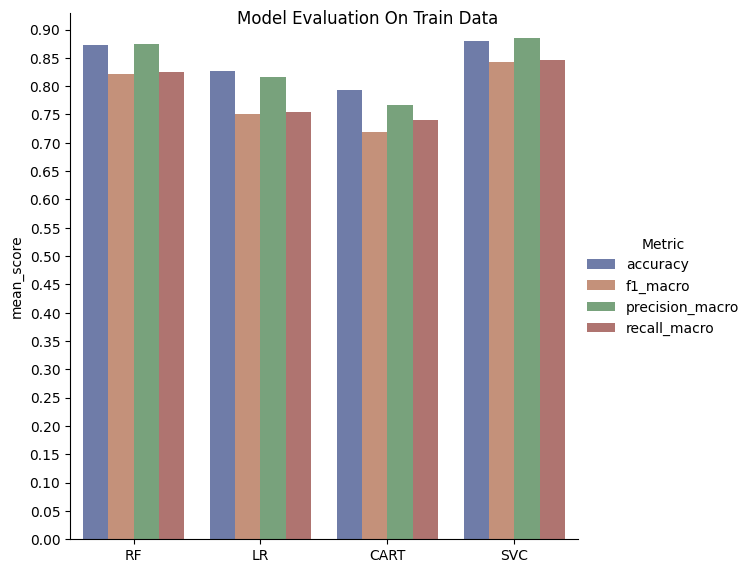

In [ ]:
# fig, ax = plt.subplots()
g=sns.catplot(
    data=train_viz_data,
    kind="bar",
    x="model_name",
    y="train_mean",
    hue="eval_metric",
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6
);

# Set axis labels
g.set_axis_labels("", "mean_score")

# Set legend title
g.legend.set_title("Metric")

# Set figure title
g.fig.suptitle("Model Evaluation On Train Data\n")

# Set y-ticks with a scale of 0.05
g.ax.set_yticks([i * 0.05 for i in range(int(g.ax.get_ylim()[1] / 0.05) + 1)])

# Show the plot
plt.show()

## 5.3. Model Selection

In [ ]:
import pickle

# Define a list to store the loaded models
loaded_models = []

# Define the list of model names
model_names = ['RF', 'LR', 'CART', 'SVC']

# Iterate over each model name
for model_name in model_names:
    # Specify the file path of the corresponding .pkl file
    file_path = f"models/{model_name}_model.pkl"

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load() to deserialize and load the model from the file
        loaded_model = pickle.load(file)

        # Append the loaded model to the list of loaded models
        loaded_models.append((model_name, loaded_model))

In [ ]:
# Define lists to store the evaluation metrics for each model
accuracies = []
f1_scores = []
precisions = []
recalls = []

# Iterate over each loaded model
for model_name, loaded_model in loaded_models:
    # Predict using the loaded model on the test data
    y_pred = loaded_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append the metrics to the respective lists
    accuracies.append((model_name, accuracy))
    f1_scores.append((model_name, f1))
    precisions.append((model_name, precision))
    recalls.append((model_name, recall))

evaluation_results = pd.DataFrame({
    'Model': [model_name for model_name, _ in loaded_models],
    'Accuracy': [accuracy for _, accuracy in accuracies],
    'F1 Score': [f1 for _, f1 in f1_scores],
    'Precision': [precision for _, precision in precisions],
    'Recall': [recall for _, recall in recalls],
})

# Print the DataFrame
evaluation_results

,Model,Accuracy,F1 Score,Precision,Recall
0,RF,0.906667,0.844444,0.863636,0.826087
1,LR,0.866667,0.756098,0.861111,0.673913
2,CART,0.900000,0.831461,0.860465,0.804348
3,SVC,0.886667,0.800000,0.871795,0.739130


In [ ]:
# Melt the evaluation_results DataFrame
melted_evaluation_results = pd.melt(
    evaluation_results,
    id_vars=['Model'],
    value_vars=['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    var_name='Metric',
    value_name='Value'
)

# Print the melted DataFrame
melted_evaluation_results

,Model,Metric,Value
0,RF,Accuracy,0.906667
1,LR,Accuracy,0.866667
2,CART,Accuracy,0.900000
3,SVC,Accuracy,0.886667
4,RF,F1 Score,0.844444
5,LR,F1 Score,0.756098
6,CART,F1 Score,0.831461
7,SVC,F1 Score,0.800000
8,RF,Precision,0.863636
9,LR,Precision,0.861111


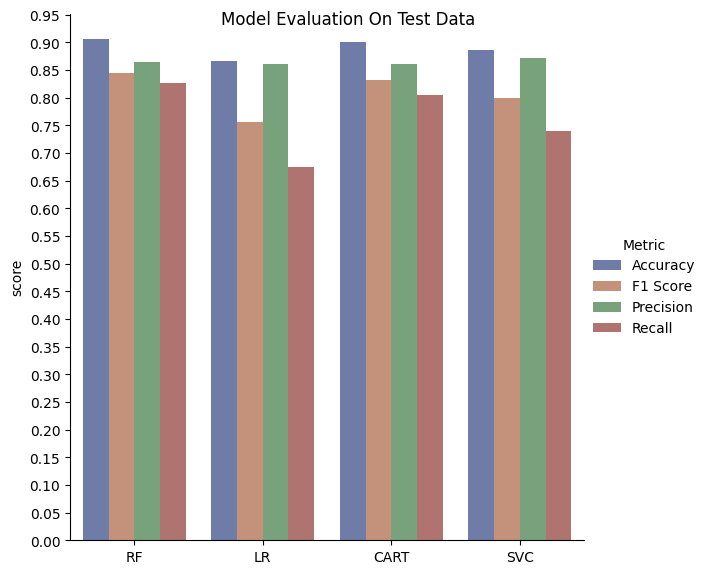

In [ ]:
# fig, ax = plt.subplots()
g=sns.catplot(
    data=melted_evaluation_results,
    kind="bar",
    x="Model",
    y="Value",
    hue="Metric",
    errorbar="sd",
    palette="dark",
    alpha=.6,
    height=6
);

# Set axis labels
g.set_axis_labels("", "score")

# Set legend title
g.legend.set_title("Metric")

# Set figure title
g.fig.suptitle("Model Evaluation On Test Data")

# Set y-ticks with a scale of 0.05
g.ax.set_yticks([i * 0.05 for i in range(int(g.ax.get_ylim()[1] / 0.05) + 1)])

# Show the plot
plt.show()

## 5.4. Models Performance Comparison (Train vs. Test)

In [ ]:
train_viz_data.head()

,model_name,eval_metric,train_mean
0,RF,accuracy,0.873333
1,RF,f1_macro,0.821855
2,RF,precision_macro,0.875290
3,RF,recall_macro,0.824505
4,LR,accuracy,0.826667


In [ ]:
train_viz_data.columns = melted_evaluation_results.columns

In [ ]:
replace_mapping = {
    'accuracy': 'Accuracy',
    'f1_macro': 'F1 Score',
    'precision_macro': 'Precision',
    'recall_macro': 'Recall'
}

train_viz_data['Metric'] = train_viz_data['Metric'].replace(replace_mapping)

In [ ]:
train_viz_data.rename({"Value": "Training Score"}, axis=1, inplace=True)
melted_evaluation_results.rename({"Value": "Testing Score"}, axis=1, inplace=True)

In [ ]:
merged_eval_df = train_viz_data.merge(
    melted_evaluation_results,
    on=['Model', 'Metric']
)

merged_eval_df

,Model,Metric,Training Score,Testing Score
0,RF,Accuracy,0.873333,0.906667
1,RF,F1 Score,0.821855,0.844444
2,RF,Precision,0.875290,0.863636
3,RF,Recall,0.824505,0.826087
4,LR,Accuracy,0.826667,0.866667
5,LR,F1 Score,0.751559,0.756098
6,LR,Precision,0.816352,0.861111
7,LR,Recall,0.754085,0.673913
8,CART,Accuracy,0.793333,0.900000
9,CART,F1 Score,0.719005,0.831461


In [ ]:
metric_opt = "Recall"

print(merged_eval_df[merged_eval_df["Metric"] == metric_opt])

   Model  Metric  Training Score  Testing Score
3     RF  Recall        0.824505       0.826087
7     LR  Recall        0.754085       0.673913
11  CART  Recall        0.739449       0.804348
15   SVC  Recall        0.846587       0.739130


We'll using Random Forest Model as it is the most stable between training and testing

In [ ]:
# Using our best model
model_file = open('/content/models/RF_model.pkl', 'rb')
model = pickle.load(model_file)
model_file.close()

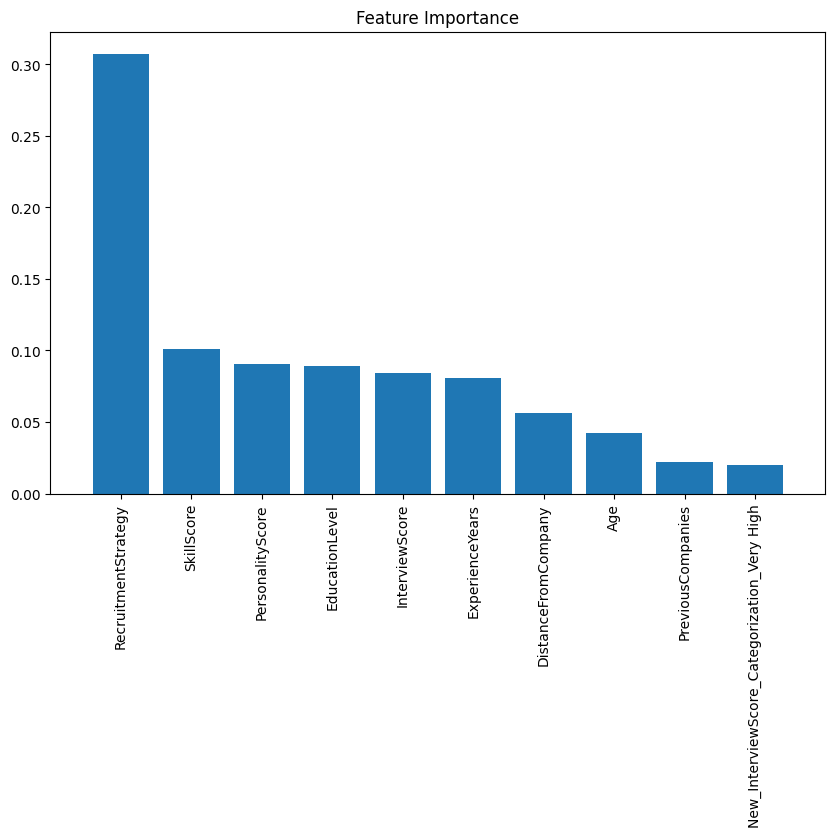

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(10), importances[indices], align="center")
plt.xticks(range(10), [features[i] for i in indices], rotation=90)
plt.xlim([-1, 10])
plt.show()

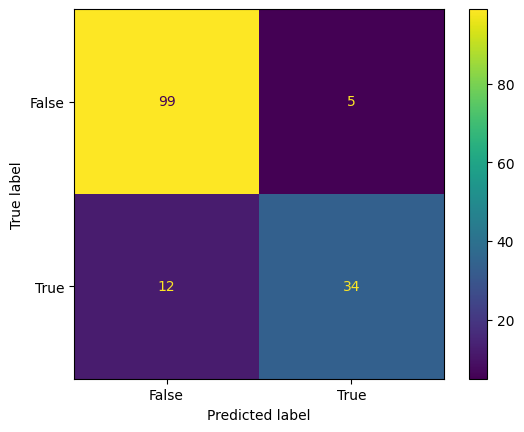

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [ ]:
probabilities = model.predict_proba(X_test)

# probabilities[:, 1] gives the probability of being accepted (class 1)
acceptance_probabilities = probabilities[:, 1]

# Print the first few predicted probabilities
print(acceptance_probabilities[:5])

[0.149 0.166 0.751 0.254 0.838]


#6.&nbsp;Testing New Data

In [ ]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')

In [ ]:
new_data = {'Age': [35],
            'Gender': [1],
            'EducationLevel': [2],
            'ExperienceYears': [3],
            'PreviousCompanies': [2],
            'DistanceFromCompany': [10.567],
            'InterviewScore': [60],
            'SkillScore': [60],
            'PersonalityScore': [50],
            'RecruitmentStrategy': [3]
            }

In [ ]:
tmp = pd.DataFrame(new_data)
tmp

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,35,1,2,3,2,10.567,60,60,50,3


In [ ]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1 non-null      int64  
 1   Gender               1 non-null      int64  
 2   EducationLevel       1 non-null      int64  
 3   ExperienceYears      1 non-null      int64  
 4   PreviousCompanies    1 non-null      int64  
 5   DistanceFromCompany  1 non-null      float64
 6   InterviewScore       1 non-null      int64  
 7   SkillScore           1 non-null      int64  
 8   PersonalityScore     1 non-null      int64  
 9   RecruitmentStrategy  1 non-null      int64  
dtypes: float64(1), int64(9)
memory usage: 208.0 bytes


In [ ]:
tmp_tf = tmp.copy()

In [ ]:
def agecategorization():
    tmp_tf['New_Age_Categorization'] = pd.cut(
    x=tmp_tf['Age'],
    bins=[0, 27, 43,59],
    labels=["Gen Z", "Millenial", "Gen X"]
    )

def interviewcategorization():
    tmp_tf['New_InterviewScore_Categorization'] = pd.cut(
    x=tmp_tf['InterviewScore'],
    bins=[-1, 21, 41, 62, 79, 100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
    )

def skillcategorization():
    tmp_tf['New_SkillScore_Categorization'] = pd.cut(
    x=tmp_tf['SkillScore'],
    bins=[-1, 20, 42,62,80,100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
    )

def personalitycategorization():
    tmp_tf['New_PersonalityScore_Categorization'] = pd.cut(
    x=tmp_tf['PersonalityScore'],
    bins=[-1, 19, 39,59,80,100],
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
    )

In [ ]:
agecategorization()
interviewcategorization()
skillcategorization()
personalitycategorization()

In [ ]:
tmp_tf

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,New_Age_Categorization,New_InterviewScore_Categorization,New_SkillScore_Categorization,New_PersonalityScore_Categorization
0,35,1,2,3,2,10.567,60,60,50,3,Millenial,Medium,Medium,Medium


In [ ]:
tmp_tf = pd.get_dummies(tmp_tf)

In [ ]:
tmp_tf.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'New_Age_Categorization_Gen Z', 'New_Age_Categorization_Millenial',
       'New_Age_Categorization_Gen X',
       'New_InterviewScore_Categorization_Very Low',
       'New_InterviewScore_Categorization_Low',
       'New_InterviewScore_Categorization_Medium',
       'New_InterviewScore_Categorization_High',
       'New_InterviewScore_Categorization_Very High',
       'New_SkillScore_Categorization_Very Low',
       'New_SkillScore_Categorization_Low',
       'New_SkillScore_Categorization_Medium',
       'New_SkillScore_Categorization_High',
       'New_SkillScore_Categorization_Very High',
       'New_PersonalityScore_Categorization_Very Low',
       'New_PersonalityScore_Categorization_Low',
       'New_PersonalityScore_Categorization_Medium',
       'New_PersonalityScore_Categorization_

In [ ]:
# prompt: for column in tmp_tf, if the column don't appear in one_hot_columns then drop the column in tmp_tf

for col in list(tmp_tf.columns):
  if col not in one_hot_columns:
    tmp_tf = tmp_tf.drop(col, axis=1)


In [ ]:
cols_need_scale =  ['Age', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy']

print("List of columns that need to be scaled:\n", cols_need_scale)

List of columns that need to be scaled:
 ['Age', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy']


In [ ]:
rs = RobustScaler()
rs.fit_transform(tmp_tf)
#tmp_tf.loc[:, cols_need_scale] = rs.fit_transform(tmp_tf[cols_need_scale])
print("Feature Scaling, Done!")

Feature Scaling, Done!


In [ ]:
tmp_tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            1 non-null      int64  
 1   Gender                                         1 non-null      int64  
 2   EducationLevel                                 1 non-null      int64  
 3   ExperienceYears                                1 non-null      int64  
 4   PreviousCompanies                              1 non-null      int64  
 5   DistanceFromCompany                            1 non-null      float64
 6   InterviewScore                                 1 non-null      int64  
 7   SkillScore                                     1 non-null      int64  
 8   PersonalityScore                               1 non-null      int64  
 9   RecruitmentStrategy                            1 non-null 

In [ ]:
y = model.predict(tmp_tf)
probabilities = model.predict_proba(tmp_tf)

In [ ]:
probabilities[:, 1]

array([0.49])

In [ ]:
y

array([0])